In [1]:
# imports needed
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('../data/cleaned-reviews.csv')
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,reviews,stars,date,country,Verified,reviews1
0,0,0,✅ Trip Verified | Easy check in a T5. Galleri...,8,2023-08-13,United Kingdom,True,easy check gallery south north lounge packed a...
1,1,1,"Not Verified | Flight delayed by an hour, it ...",2,2023-08-12,United States,False,verified flight delayed hour happens biggie u ...
2,2,2,Not Verified | The staff are very rude and not...,2,2023-08-11,United Kingdom,False,verified staff rude trained properly exception...
3,3,3,✅ Trip Verified | Good domestic flight operat...,10,2023-08-08,United Kingdom,True,good domestic flight operated ba cityflyer gro...
4,4,4,Not Verified | Failed at all basic travel fund...,1,2023-08-08,Canada,False,verified failed basic travel fundamental fligh...


In [3]:
# average rating ?
# df.stars.mean()

Text(0.5, 0.98, 'Counts for each rating')

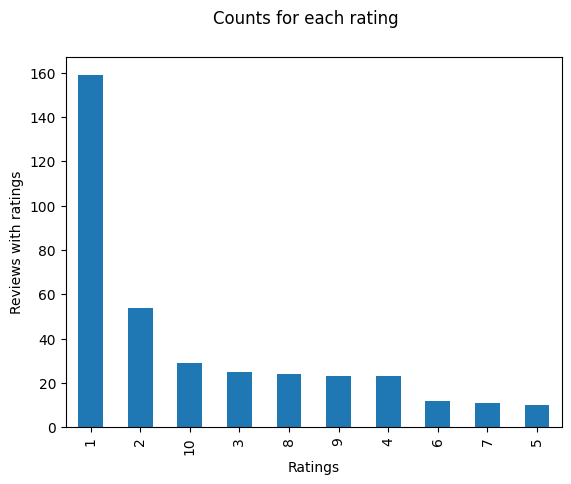

In [4]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Reviews with ratings')
plt.suptitle('Counts for each rating')

In [5]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.values/ df_ratings.values.sum() *100).tolist()
pct_values = [round(x[0],2) for x in pct_values]
df_ratings['pct_values'] = pct_values



df_ratings = df_ratings.reset_index()


In [6]:
df_ratings.rename(columns={'count':'total_counts','stars':'Stars'},inplace=True)
df_ratings

,Stars,total_counts,pct_values
0,1,159,42.97
1,2,54,14.59
2,10,29,7.84
3,3,25,6.76
4,8,24,6.49
5,9,23,6.22
6,4,23,6.22
7,6,12,3.24
8,7,11,2.97
9,5,10,2.70


Text(0.5, 1.0, 'Counts for each ratings')

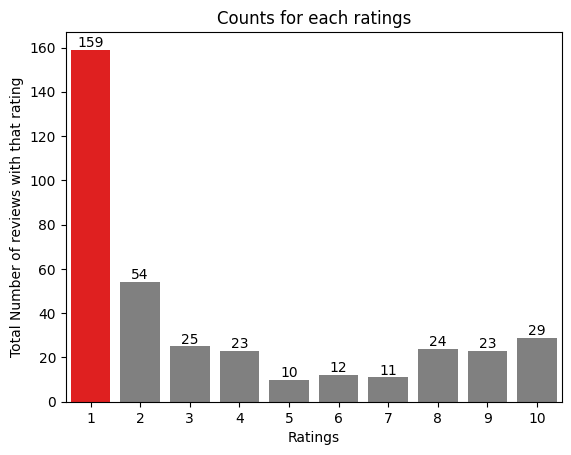

In [7]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [8]:
print(f"{len(df.country.unique())} unique countries")


35 unique countries


In [9]:
# Which country most review comes from?
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()


In [10]:
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

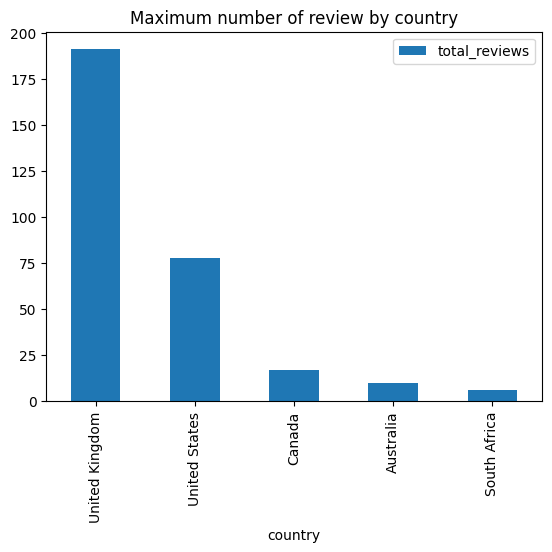

In [11]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")


In [12]:
# Time Series Analysis
        ##convert the date datatype to datetime
df.date = pd.to_datetime(df.date)

In [13]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

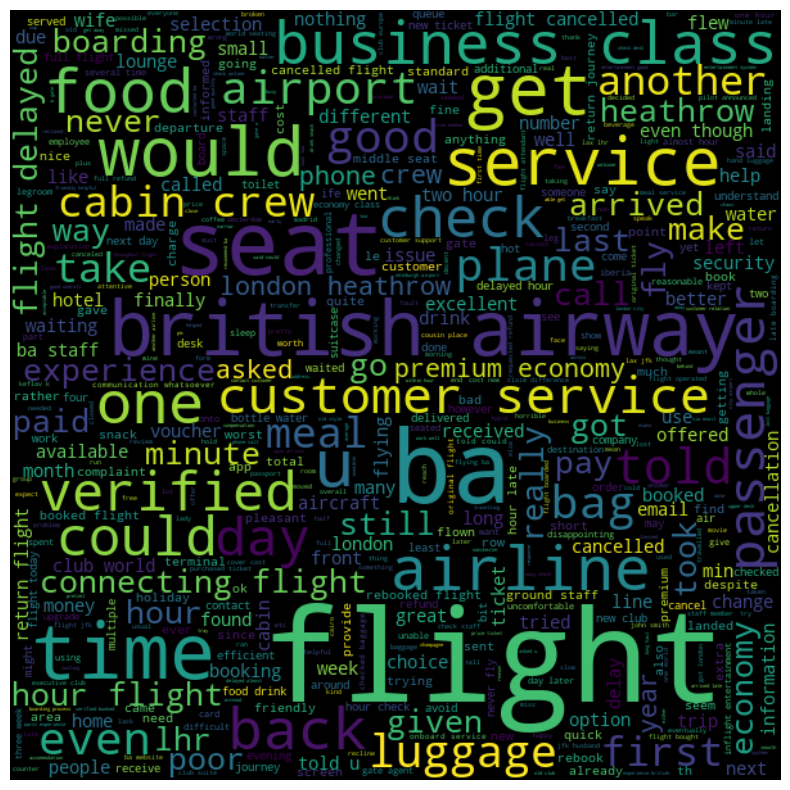

In [14]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.reviews1)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

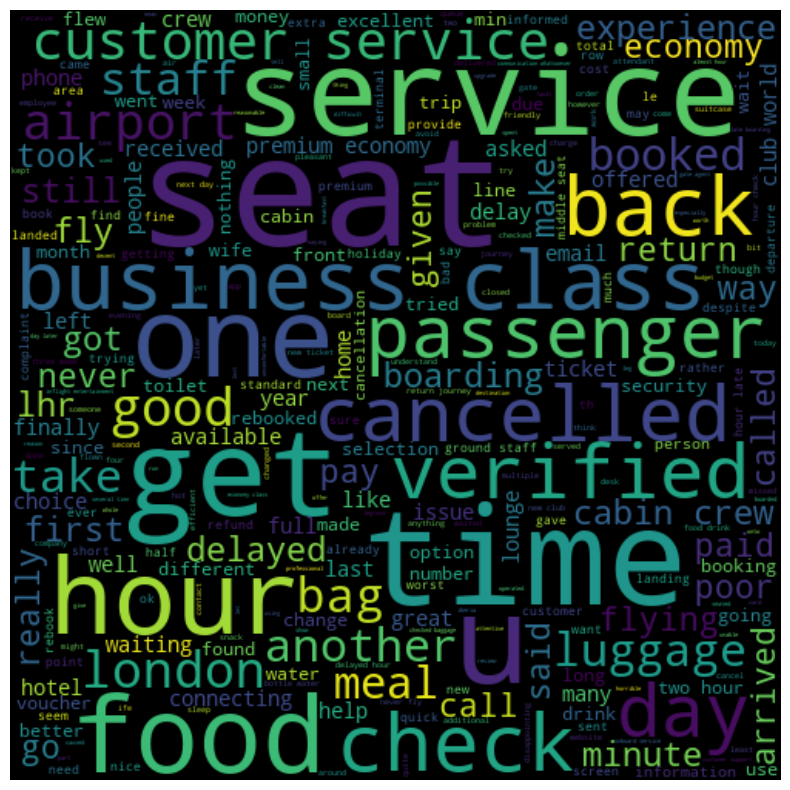

In [15]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.reviews1)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Word Frequency
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'staff'),
  Text(5, 0, 'check'),
  Text(6, 0, 'crew'),
  Text(7, 0, 'airport'),
  Text(8, 0, 'customer'),
  Text(9, 0, 'food'),
  Text(10, 0, 'class'),
  Text(11, 0, 'good'),
  Text(12, 0, 'told'),
  Text(13, 0, 'ticket'),
  Text(14, 0, 'bag'),
  Text(15, 0, 'business'),
  Text(16, 0, 'day'),
  Text(17, 0, 'verified'),
  Text(18, 0, 'economy'),
  Text(19, 0, 'luggage')])

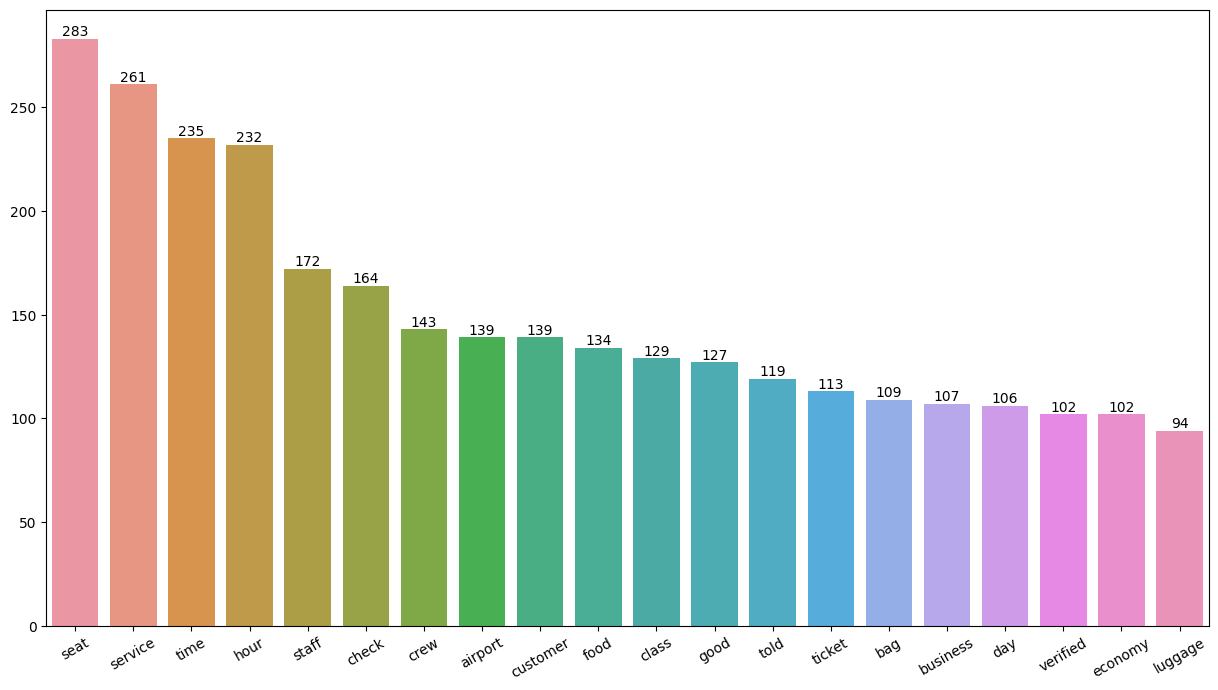

In [17]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

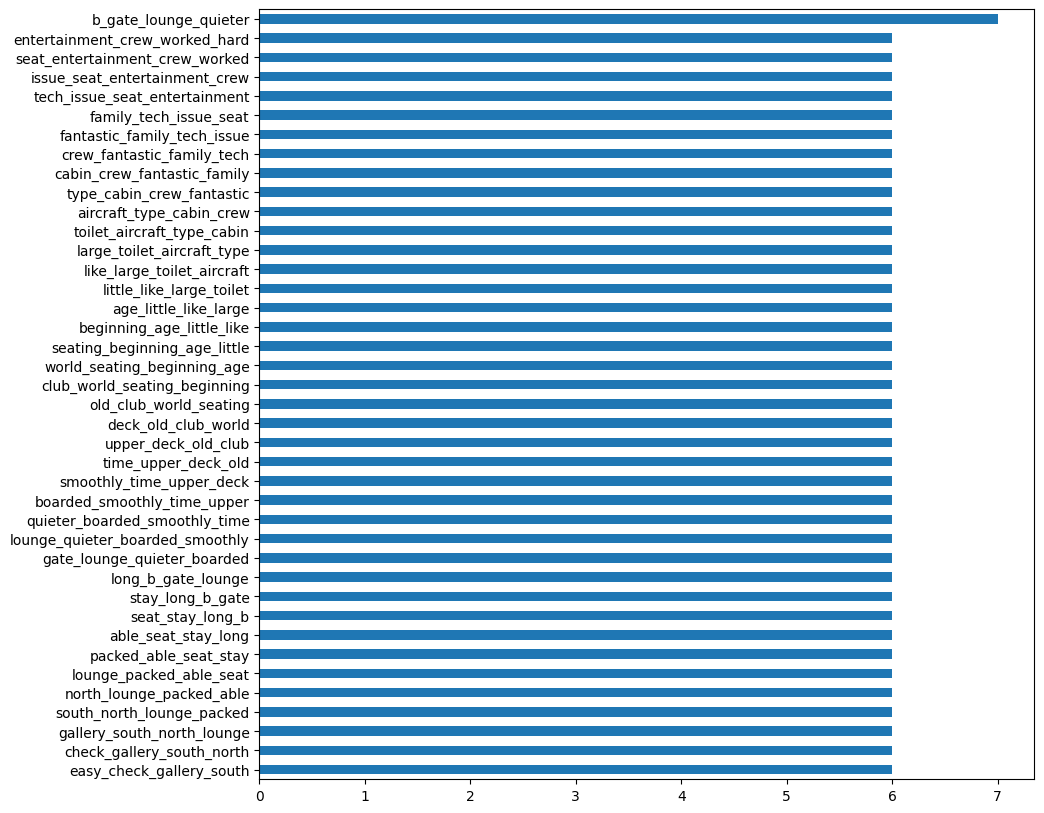

In [18]:
# Word Frequency with N-gram
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.reviews1)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)



In [19]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

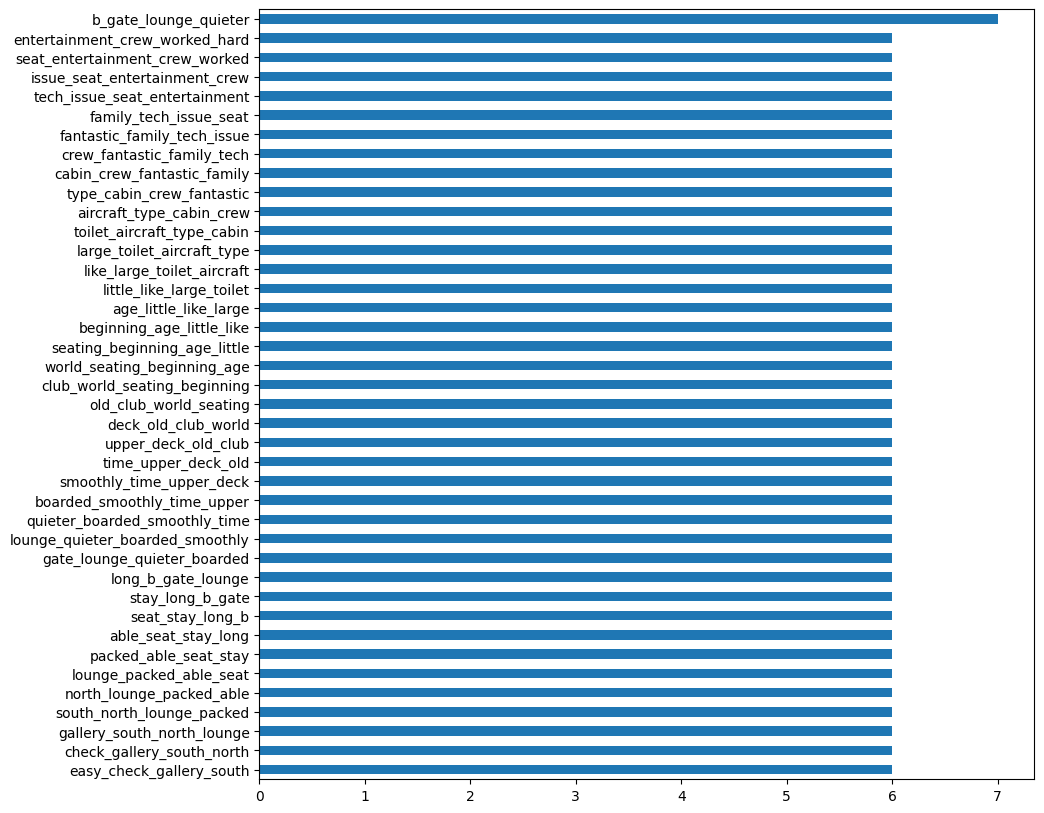

In [20]:
reviews_1_3 = " ".join(ratings_1_3.reviews1)
reviews_4_6 = " ".join(ratings_4_6.reviews1)
reviews_7_10 = " ".join(ratings_7_10.reviews1)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

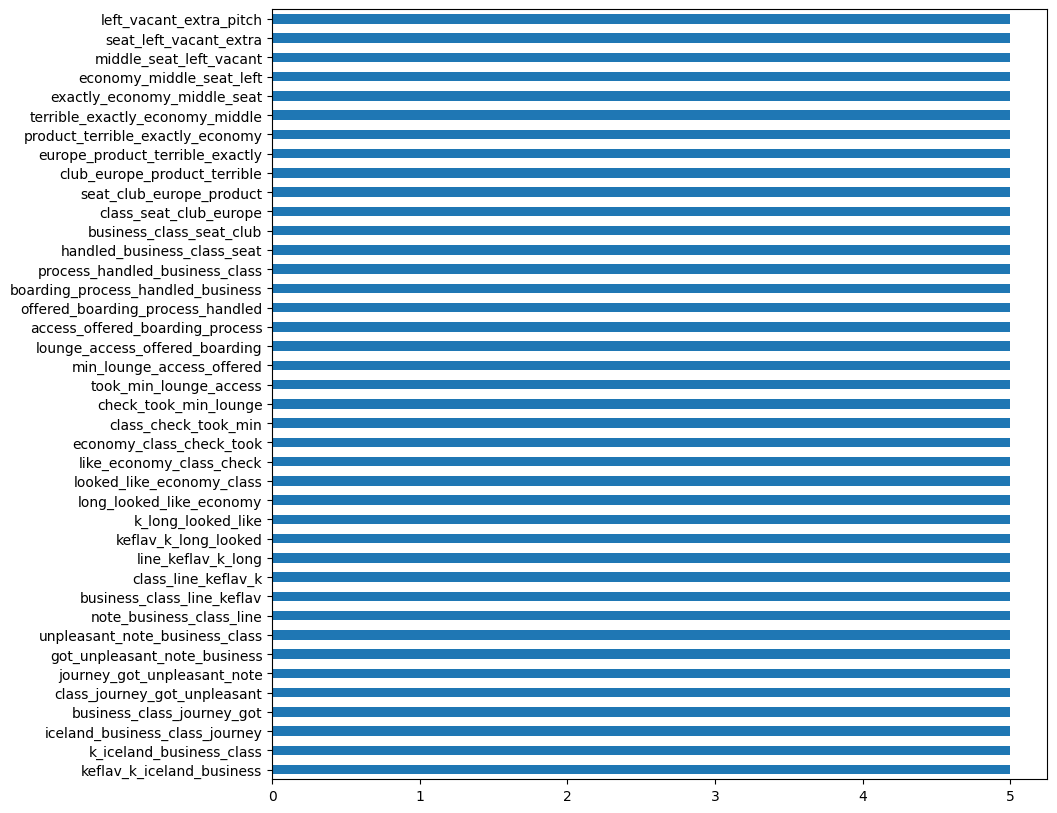

In [21]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

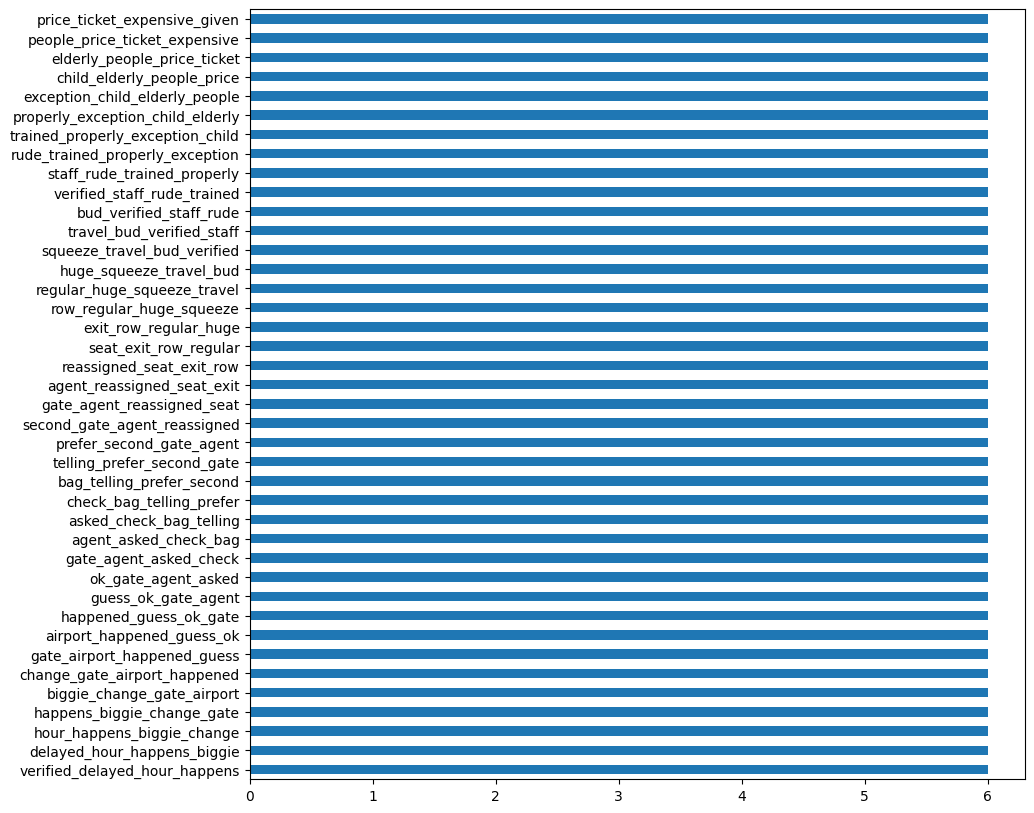

In [22]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [23]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.reviews1)):
    sent= TextBlob(df.reviews1[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity